In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
#import data set
df = pd.read_csv("GrammarandProductReviews.csv")
df.head(10)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,Online_Reviews_Rating,reviews.sourceURLs,Online_Reviews,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.03E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.03E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,149773828.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,Samantha,67981934427
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,129088591.0,NaN,1,https://www.walmart.com/reviews/product/43383370,Bought this earlier today and was excited to c...,Disappointing,NaN,NaN,Raeanne,67981934427
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,131769441.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I bought this product for my husband and I to ...,Not happy at all,NaN,NaN,Kimmie,67981934427
8,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,148314686.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband and I bought this for some extra fu...,Very disappointing,NaN,NaN,cassie,67981934427
9,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualityplea

In [3]:
#Filter data
filtered_data = df[['Online_Reviews_Rating' , 'Online_Reviews']]
filtered_data.head(10)

,Online_Reviews_Rating,Online_Reviews
0,5,i love this album. it's very good. more to the...
1,5,Good flavor. This review was collected as part...
2,5,Good flavor.
3,1,I read through the reviews on here before look...
4,1,My husband bought this gel for us. The gel cau...
5,1,My boyfriend and I bought this to spice things...
6,1,Bought this earlier today and was excited to c...
7,1,I bought this product for my husband and I to ...
8,1,My husband and I bought this for some extra fu...
9,1,Got as a surprise for my husband there is noth...


In [4]:
#check for missing data
filtered_data.isnull().any()

Online_Reviews_Rating    False
Online_Reviews           False
dtype: bool

In [5]:
filtered_data.isnull().sum()

Online_Reviews_Rating    0
Online_Reviews           0
dtype: int64

In [6]:
def func(row):
    #print(row)
    if row>4.0:       
        return 'Good opinion'
    elif row>2.0 and row<=4.0:
        return 'Average opinion'
    else:
        return 'Bad opinion'
    

filtered_data["Opinion"] = filtered_data["Online_Reviews_Rating"].apply(func)

c:\python\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [7]:
filtered_data.head(10)

,Online_Reviews_Rating,Online_Reviews,Opinion
0,5,i love this album. it's very good. more to the...,Good opinion
1,5,Good flavor. This review was collected as part...,Good opinion
2,5,Good flavor.,Good opinion
3,1,I read through the reviews on here before look...,Bad opinion
4,1,My husband bought this gel for us. The gel cau...,Bad opinion
5,1,My boyfriend and I bought this to spice things...,Bad opinion
6,1,Bought this earlier today and was excited to c...,Bad opinion
7,1,I bought this product for my husband and I to ...,Bad opinion
8,1,My husband and I bought this for some extra fu...,Bad opinion
9,1,Got as a surprise for my husband there is noth...,Bad opinion


In [8]:
#Total counts of opinion categories
print(filtered_data["Opinion"].value_counts())

Good opinion       15259
Average opinion     4189
Bad opinion          552
Name: Opinion, dtype: int64


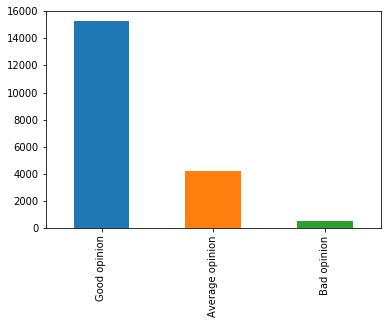

In [9]:
#opinion categrory graph
filtered_data["Opinion"].value_counts().plot.bar()

In [10]:

def text_process(review_message):
    
    cleantext_reg = re.compile('[^a-z]+')

    nopunc = [char for char in review_message if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    
    lower_case = nopunc.lower()
    processed_review = cleantext_reg.sub(' ', lower_case).strip()
    
    return processed_review

In [11]:
filtered_data["Preprocessed_Opinion"] = filtered_data["Online_Reviews"].apply(text_process)

c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
filtered_data.head()

,Online_Reviews_Rating,Online_Reviews,Opinion,Preprocessed_Opinion
0,5,i love this album. it's very good. more to the...,Good opinion,i love this album its very good more to the hi...
1,5,Good flavor. This review was collected as part...,Good opinion,good flavor this review was collected as part ...
2,5,Good flavor.,Good opinion,good flavor
3,1,I read through the reviews on here before look...,Bad opinion,i read through the reviews on here before look...
4,1,My husband bought this gel for us. The gel cau...,Bad opinion,my husband bought this gel for us the gel caus...


In [13]:
processed_review_train, processed_review_test, opinion_train, opinion_test = train_test_split(filtered_data["Preprocessed_Opinion"], filtered_data["Opinion"], test_size=0.2,random_state=101)

print(len(processed_review_train), len(processed_review_test), len(processed_review_train) + len(processed_review_test))

16000 4000 20000


In [14]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
swords=list(stopwords)
swords.remove("not")

vec = CountVectorizer(min_df=2 ,stop_words=frozenset(swords) , ngram_range=(1,3)).fit(filtered_data["Preprocessed_Opinion"])

bag_of_words = vec.transform(filtered_data["Preprocessed_Opinion"])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)[:10]
print(words_freq)

[('part', 7573), ('review', 7505), ('collected', 7408), ('promotion', 7408), ('review collected', 7407), ('collected part', 7407), ('part promotion', 7407), ('review collected part', 7407), ('collected part promotion', 7407), ('use', 6703)]


In [15]:
count_vect = CountVectorizer(min_df=2 ,stop_words=swords , ngram_range=(1,3))

X_Train_counts = count_vect.fit_transform(processed_review_train)

In [16]:
X_Test_counts = count_vect.transform(processed_review_test)

In [17]:
print('Shape of Sparse Matrix: ', X_Test_counts.shape)
print('Amount of Non-Zero occurences: ', X_Test_counts.nnz)

Shape of Sparse Matrix:  (4000, 53355)
Amount of Non-Zero occurences:  100382


In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_Train_tfidf = tfidf_transformer.fit_transform(X_Train_counts)

In [19]:
X_Test_tfidf = tfidf_transformer.transform(X_Test_counts)

In [20]:
print(X_Train_tfidf.shape)
print(X_Test_tfidf.shape)

(16000, 53355)
(4000, 53355)


In [21]:
prediction={}

In [22]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=10000)
logistic = logreg.fit(X_Train_tfidf, opinion_train)
prediction['LogisticRegression'] = logreg.predict(X_Test_tfidf)
print("Logistic Regression Accuracy : {}".format(logreg.score(X_Test_tfidf , opinion_test)))



Logistic Regression Accuracy : 0.77


In [23]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svmclassifier = SVC(kernel = 'linear', random_state = 0)
svmclassifier.fit(X_Train_tfidf, opinion_train)

# Predicting the Test set results
prediction['SVM'] = svmclassifier.predict(X_Test_tfidf)

In [24]:
print("SVM Accuracy : {}".format(svmclassifier.score(X_Test_tfidf , opinion_test)))


SVM Accuracy : 0.795


In [25]:
new_reviewsdf = pd.read_csv("Predict_NewOnlineReview.csv")
new_reviewsfiltered_data = new_reviewsdf[['Online_Reviews']]
print(new_reviewsfiltered_data.head(10))
print(new_reviewsfiltered_data.count())

                                      Online_Reviews
0  I only use the Shampoo Suave Sleek and its the...
1  I absolutely love this shampoo ! It has made m...
2  Works like the most expensive shampoo but at a...
3  I have curly unruly hair, and Suave Sleek and ...
4  I love this shampoo! Years ago, I was having s...
5  Texture not quite what I've had in other brand...
6  I've had premium tuna in a can and this was no...
7                    Tuna is good. Not cheap though.
8  This is the only tunI buy. If you are a tuna f...
9  I had 2 cans of tuna. One was Bumble Bee the o...
Online_Reviews    150
dtype: int64


In [26]:
new_reviewsfiltered_data["Preprocessed_Opinion"] = new_reviewsfiltered_data["Online_Reviews"].apply(text_process)

c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
new_reviewsfiltered_data.head()

,Online_Reviews,Preprocessed_Opinion
0,I only use the Shampoo Suave Sleek and its the...,i only use the shampoo suave sleek and its the...
1,I absolutely love this shampoo ! It has made m...,i absolutely love this shampoo it has made my ...
2,Works like the most expensive shampoo but at a...,works like the most expensive shampoo but at a...
3,"I have curly unruly hair, and Suave Sleek and ...",i have curly unruly hair and suave sleek and s...
4,"I love this shampoo! Years ago, I was having s...",i love this shampoo years ago i was having so ...


In [28]:
New_Reviews_counts = count_vect.transform(new_reviewsfiltered_data["Preprocessed_Opinion"])
New_Reviews_tfidf = tfidf_transformer.transform(New_Reviews_counts)

In [29]:
print(New_Reviews_tfidf.toarray())
print(New_Reviews_tfidf.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(150, 53355)


In [30]:
new_reviewsfiltered_data["Logistic Regression"] = logreg.predict(New_Reviews_tfidf)

c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
new_reviewsfiltered_data.head(10)

,Online_Reviews,Preprocessed_Opinion,Logistic Regression
0,I only use the Shampoo Suave Sleek and its the...,i only use the shampoo suave sleek and its the...,Good opinion
1,I absolutely love this shampoo ! It has made m...,i absolutely love this shampoo it has made my ...,Good opinion
2,Works like the most expensive shampoo but at a...,works like the most expensive shampoo but at a...,Good opinion
3,"I have curly unruly hair, and Suave Sleek and ...",i have curly unruly hair and suave sleek and s...,Good opinion
4,"I love this shampoo! Years ago, I was having s...",i love this shampoo years ago i was having so ...,Average opinion
5,Texture not quite what I've had in other brand...,texture not quite what ive had in other brands...,Good opinion
6,I've had premium tuna in a can and this was no...,ive had premium tuna in a can and this was not...,Good opinion
7,Tuna is good. Not cheap though.,tuna is good not cheap though,Bad opinion
8,This is the only tunI buy. If you are a tuna f...,this is the only tuni buy if you are a tuna fa...,Good opinion
9,I had 2 cans of tuna. One was Bumble Bee the o...,i had cans of tuna one was bumble bee the othe...,Good opinion


In [32]:
new_reviewsfiltered_data["SVM"] = svmclassifier.predict(New_Reviews_tfidf)

c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
new_reviewsfiltered_data.head(10)
new_reviewsfiltered_data.to_csv("New Reviews Opinion.csv",index=False)

In [34]:
keys = prediction.keys()
for key in keys:
    print(" {}:".format(key))
    print(metrics.classification_report(opinion_test, prediction.get(key), target_names = ["Good opinion", "Average opinion","Bad opinion"]))
    print("\n")

 LogisticRegression:
                 precision    recall  f1-score   support

   Good opinion       0.48      0.41      0.44       835
Average opinion       0.56      0.40      0.46       108
    Bad opinion       0.84      0.88      0.86      3057

    avg / total       0.76      0.77      0.76      4000



 SVM:
                 precision    recall  f1-score   support

   Good opinion       0.61      0.23      0.33       835
Average opinion       0.85      0.31      0.45       108
    Bad opinion       0.81      0.97      0.88      3057

    avg / total       0.77      0.80      0.76      4000



